# Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Test set Image Processing

In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,S
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 1392 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two

# Loading Model

In [3]:
model = tf.keras.models.load_model('trained_plant_disease_model.keras')

# Visualising and Performing Prediction on Single image

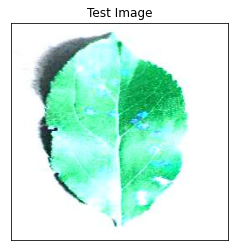

In [4]:
#Test Image Visualization
import matplotlib.pyplot as plt
import numpy as np
import cv2
image_path = 'C:/Users/Administrator/Documents/PROJECT Plant_Disease_Prediction/test/AppleCedarRust1.JPG'
# Reading an image in default mode
img = plt.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing model

In [7]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)

In [8]:

print(predictions)

[[3.8179565e-05 4.5626370e-05 4.0644225e-01 4.3390457e-07 3.3512560e-04
  1.9051482e-01 4.3505486e-05 2.9774071e-04 3.5749997e-07 8.2827080e-03
  5.2137348e-06 2.4468944e-05 2.5968453e-07 1.0993753e-05 4.9230286e-05
  5.6589860e-03 8.3766936e-05 5.3939022e-08 4.2562700e-05 1.6341948e-04
  1.8367639e-06 2.9000934e-04 1.9038611e-05 3.1522859e-04 1.6998641e-09
  8.2724728e-07 4.3261549e-03 3.4853741e-07 2.3477497e-04 5.9256872e-06
  3.0551285e-02 5.8218249e-04 3.4595975e-01 5.3677418e-06 5.7393923e-08
  5.6659551e-03 5.1775163e-07 1.0532640e-06]]


In [9]:

result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


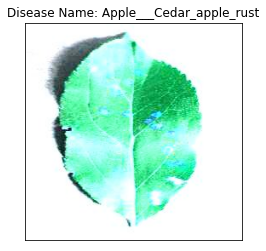

In [10]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()